# import dependencies

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import chiller system data

In [442]:
df=pd.read_csv('data_dump.csv',parse_dates=True)

# Instructions
This chiller system has the symptom of "low chilled water delta T".  That is the chilled water supply and chilled water return temperature differences are small (less than 3 Degree Celsius).

- Chilled Water Supply Temp: CHWS_Temp
- Chilled Water Return Temp: CHWR_Temp

1. Please consider the readings when the chiller is on (when Comp_Power > 10).
2. Each of the 4 chillers (ACPC 1 to 4) would have their own temperature and power sensors, i.e.: ACPC-XCHWS_Temp, ACPC-XCHWR_Temp, ACPC-XComp_Power
3. (optional) You might also consider the flow rate of chilled water flowing through each chiller.


Please provide a detailed visual chart(s) to identify and diagnose the symptom and provide the best suitable analysis. 

In [443]:
# Identify Chilled Water Supply Temp (CHWS_Temp) and Chilled Water Return Temp (CHWR_Temp) columns
print(df.columns[df.columns.str.contains("CHWS_Temp")])
print(df.columns[df.columns.str.contains("CHWR_Temp")])
print(df.columns[df.columns.str.contains("Comp_Power")])
print(df.columns[df.columns.str.contains("Rate")])

Index(['ACPC-4CHWS_Temp', 'ACPC-1CHWS_Temp', 'ACPC-3CHWS_Temp',
       'ACPC-2CHWS_Temp'],
      dtype='object')
Index(['ACPC-4CHWR_Temp', 'ACPC-1CHWR_Temp', 'ACPC-3CHWR_Temp',
       'ACPC-2CHWR_Temp'],
      dtype='object')
Index(['ACPC-4Comp_Power', 'ACPC-1Comp_Power', 'ACPC-3Comp_Power',
       'ACPC-2Comp_Power'],
      dtype='object')
Index(['ACPC-4Flow_Rate', 'ACPC-1Flow_Rate', 'ACPC-3Flow_Rate',
       'ACPC-2Flow_Rate', 'Chiller HeaderFlow_Rate'],
      dtype='object')


In [444]:
# get the data for when the chiller is on (Comp_Power > 10) for each chiller
ACPC1_on=df[df['ACPC-1Comp_Power'] > 10]
ACPC2_on=df[df['ACPC-2Comp_Power'] > 10]
ACPC3_on=df[df['ACPC-3Comp_Power'] > 10]
ACPC4_on=df[df['ACPC-4Comp_Power'] > 10]

# get the flow rate data for when the chiller is on (Comp_Power > 10) for each chiller
ACPC1_Rate_on=df['ACPC-1Flow_Rate'][df['ACPC-1Comp_Power'] > 10]
ACPC2_Rate_on=df['ACPC-2Flow_Rate'][df['ACPC-2Comp_Power'] > 10]
ACPC3_Rate_on=df['ACPC-3Flow_Rate'][df['ACPC-3Comp_Power'] > 10]
ACPC4_Rate_on=df['ACPC-4Flow_Rate'][df['ACPC-4Comp_Power'] > 10]


In [445]:
# get the difference between CHWS_Temp and CHWR_Temp when the chiller is on (Comp_Power > 10) for each chiller
    # this is actually the same as 'ACPC-1CHW_Temp_Diff' column but I calculate this myself instead of assuming the Temp_Diff data is correct.
    # For instance, the Temp_Diff column data does not compute the absolute value of the difference, which I think is most appropriate to use because the instructions imply to only consider only the magnitude of the difference and not the direction of the difference.
ACPC1_Temp_diff=[]
for i,j in zip(ACPC1_on['ACPC-1CHWS_Temp'],ACPC1_on['ACPC-1CHWR_Temp']):
    ACPC1_Temp_diff.append(abs(i-j))
ACPC2_Temp_diff=[]
for i,j in zip(ACPC2_on['ACPC-2CHWS_Temp'],ACPC2_on['ACPC-2CHWR_Temp']):
    ACPC2_Temp_diff.append(abs(i-j))
ACPC3_Temp_diff=[]
for i,j in zip(ACPC3_on['ACPC-3CHWS_Temp'],ACPC3_on['ACPC-3CHWR_Temp']):
    ACPC3_Temp_diff.append(abs(i-j))
ACPC4_Temp_diff=[]
for i,j in zip(ACPC4_on['ACPC-4CHWS_Temp'],ACPC4_on['ACPC-4CHWR_Temp']):
    ACPC4_Temp_diff.append(abs(i-j))

In [446]:
# get the timestamps when the chiller is on (Comp_Power > 10) for each chiller
ACPC1_on_time=pd.to_datetime(ACPC1_on['timestamp'])
ACPC2_on_time=pd.to_datetime(ACPC2_on['timestamp'])
ACPC3_on_time=pd.to_datetime(ACPC3_on['timestamp'])
ACPC4_on_time=pd.to_datetime(ACPC4_on['timestamp'])

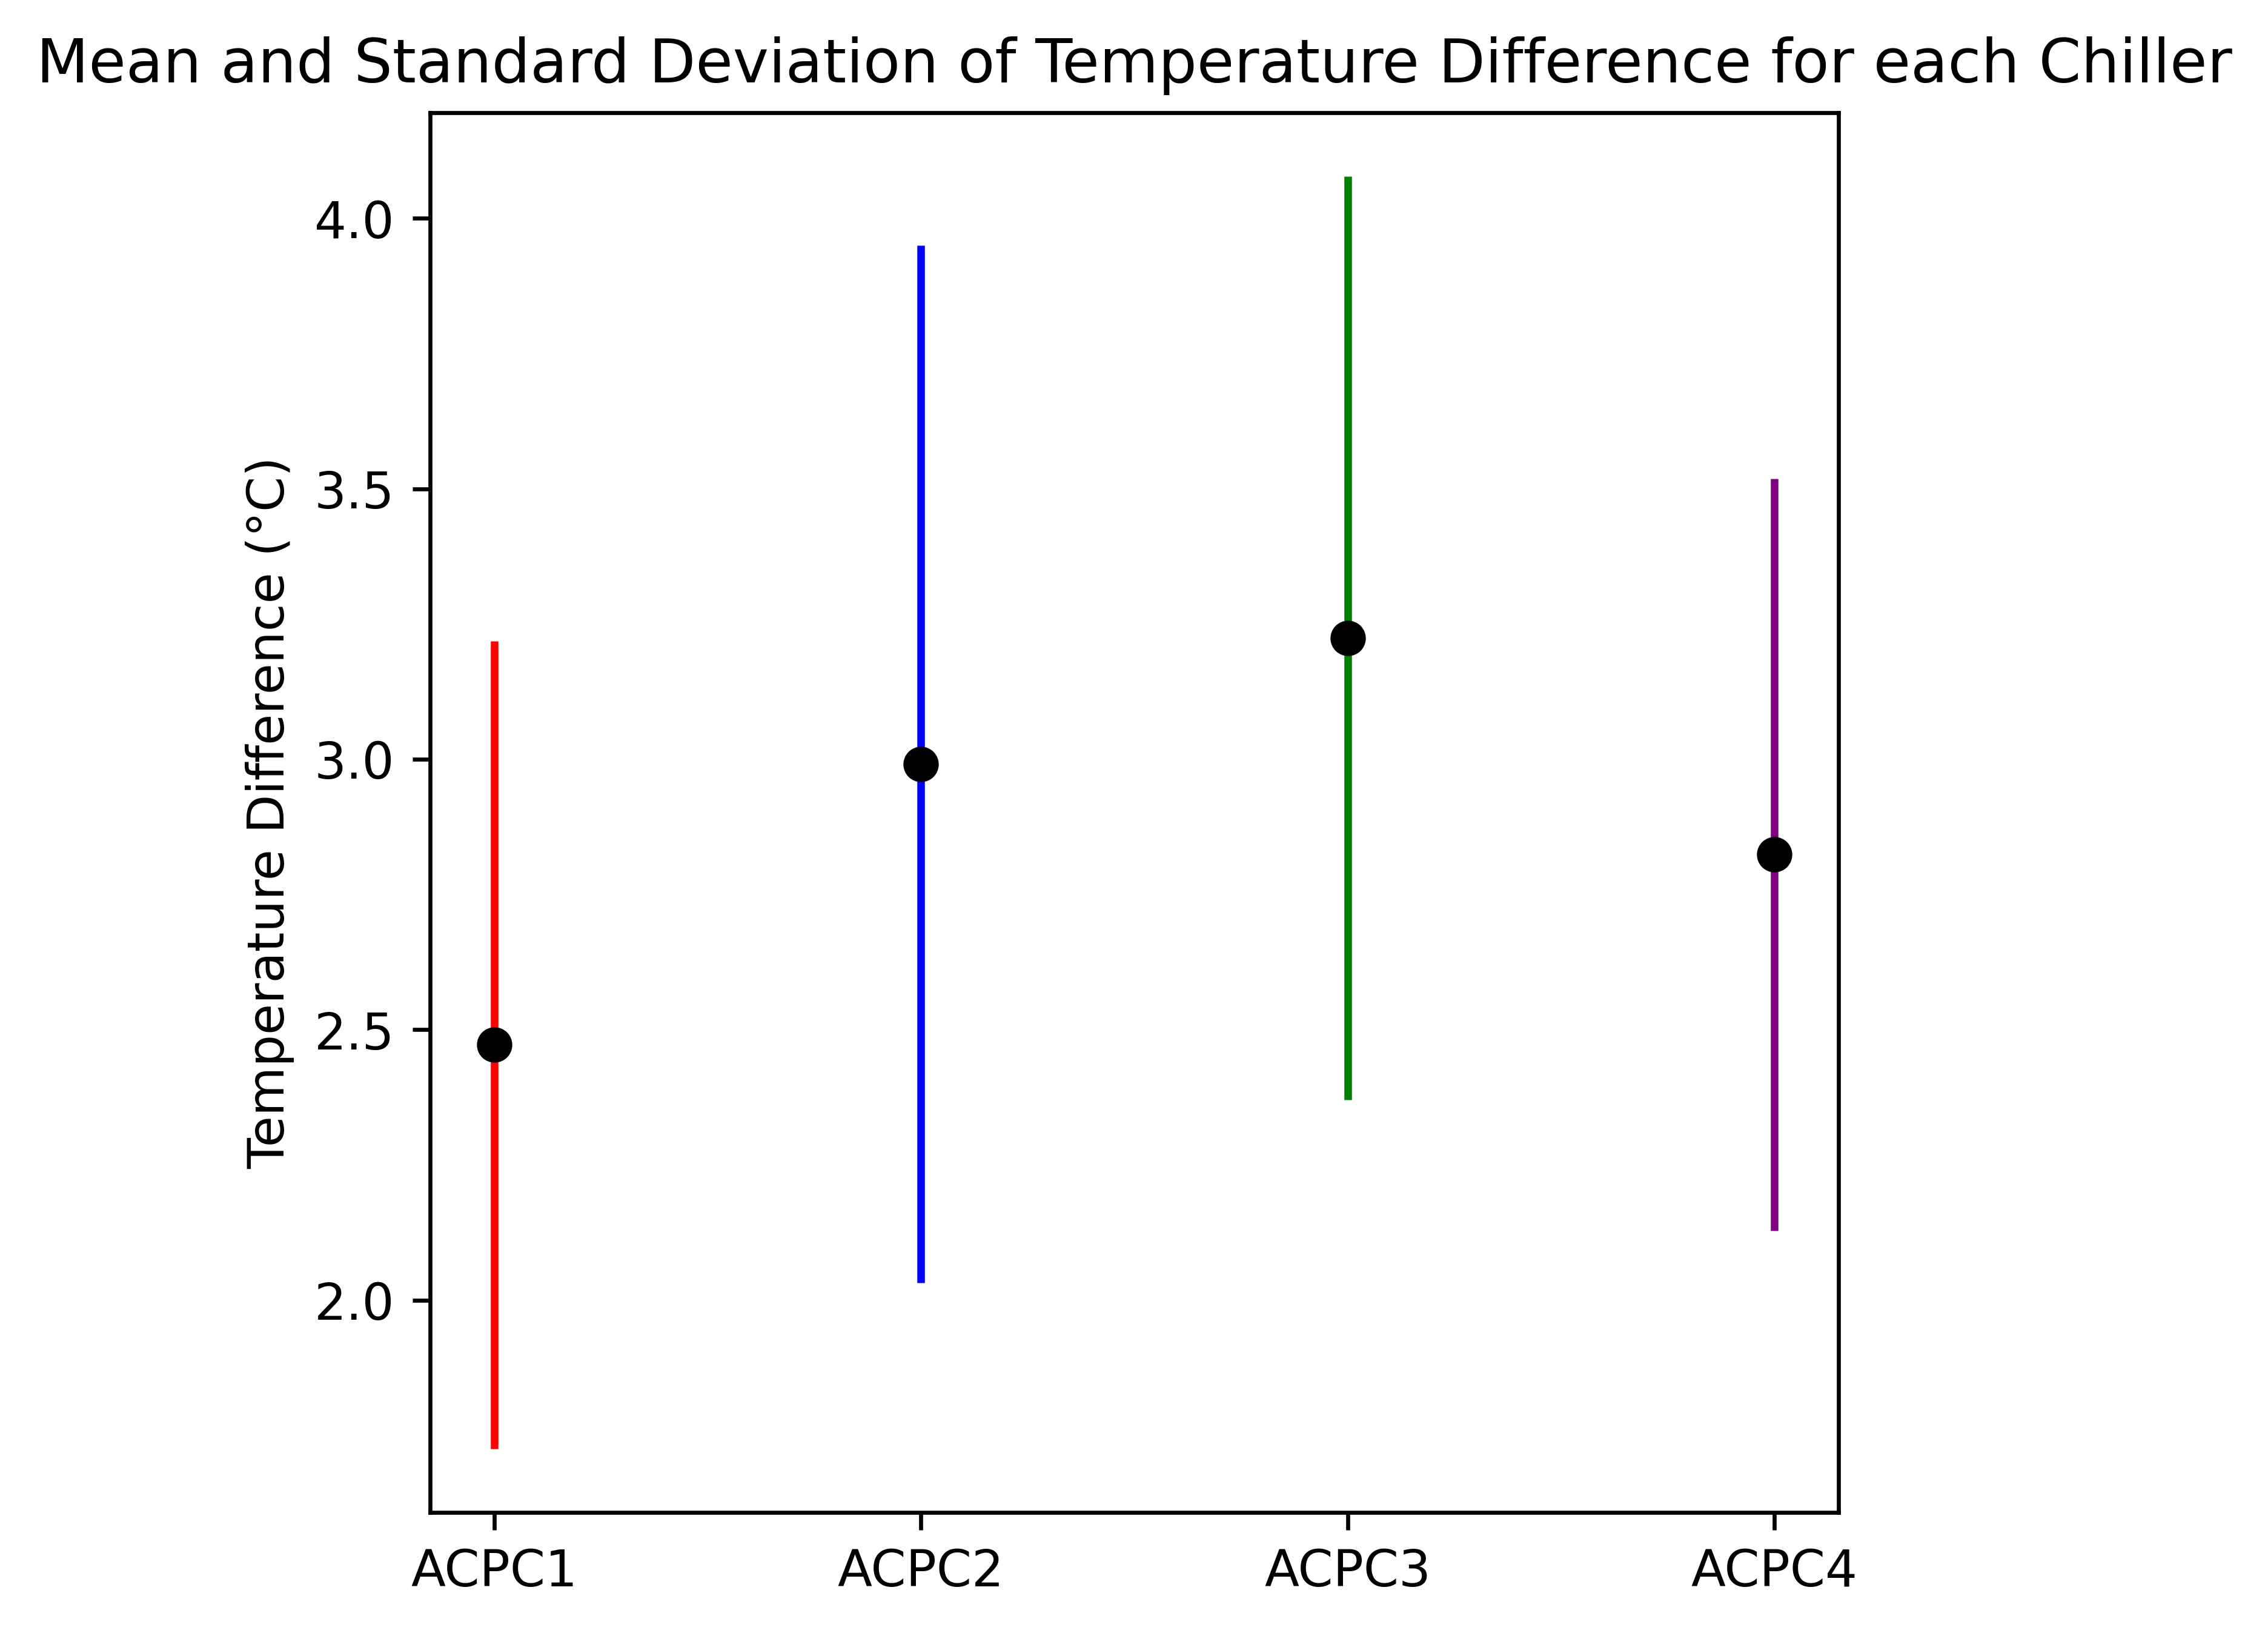

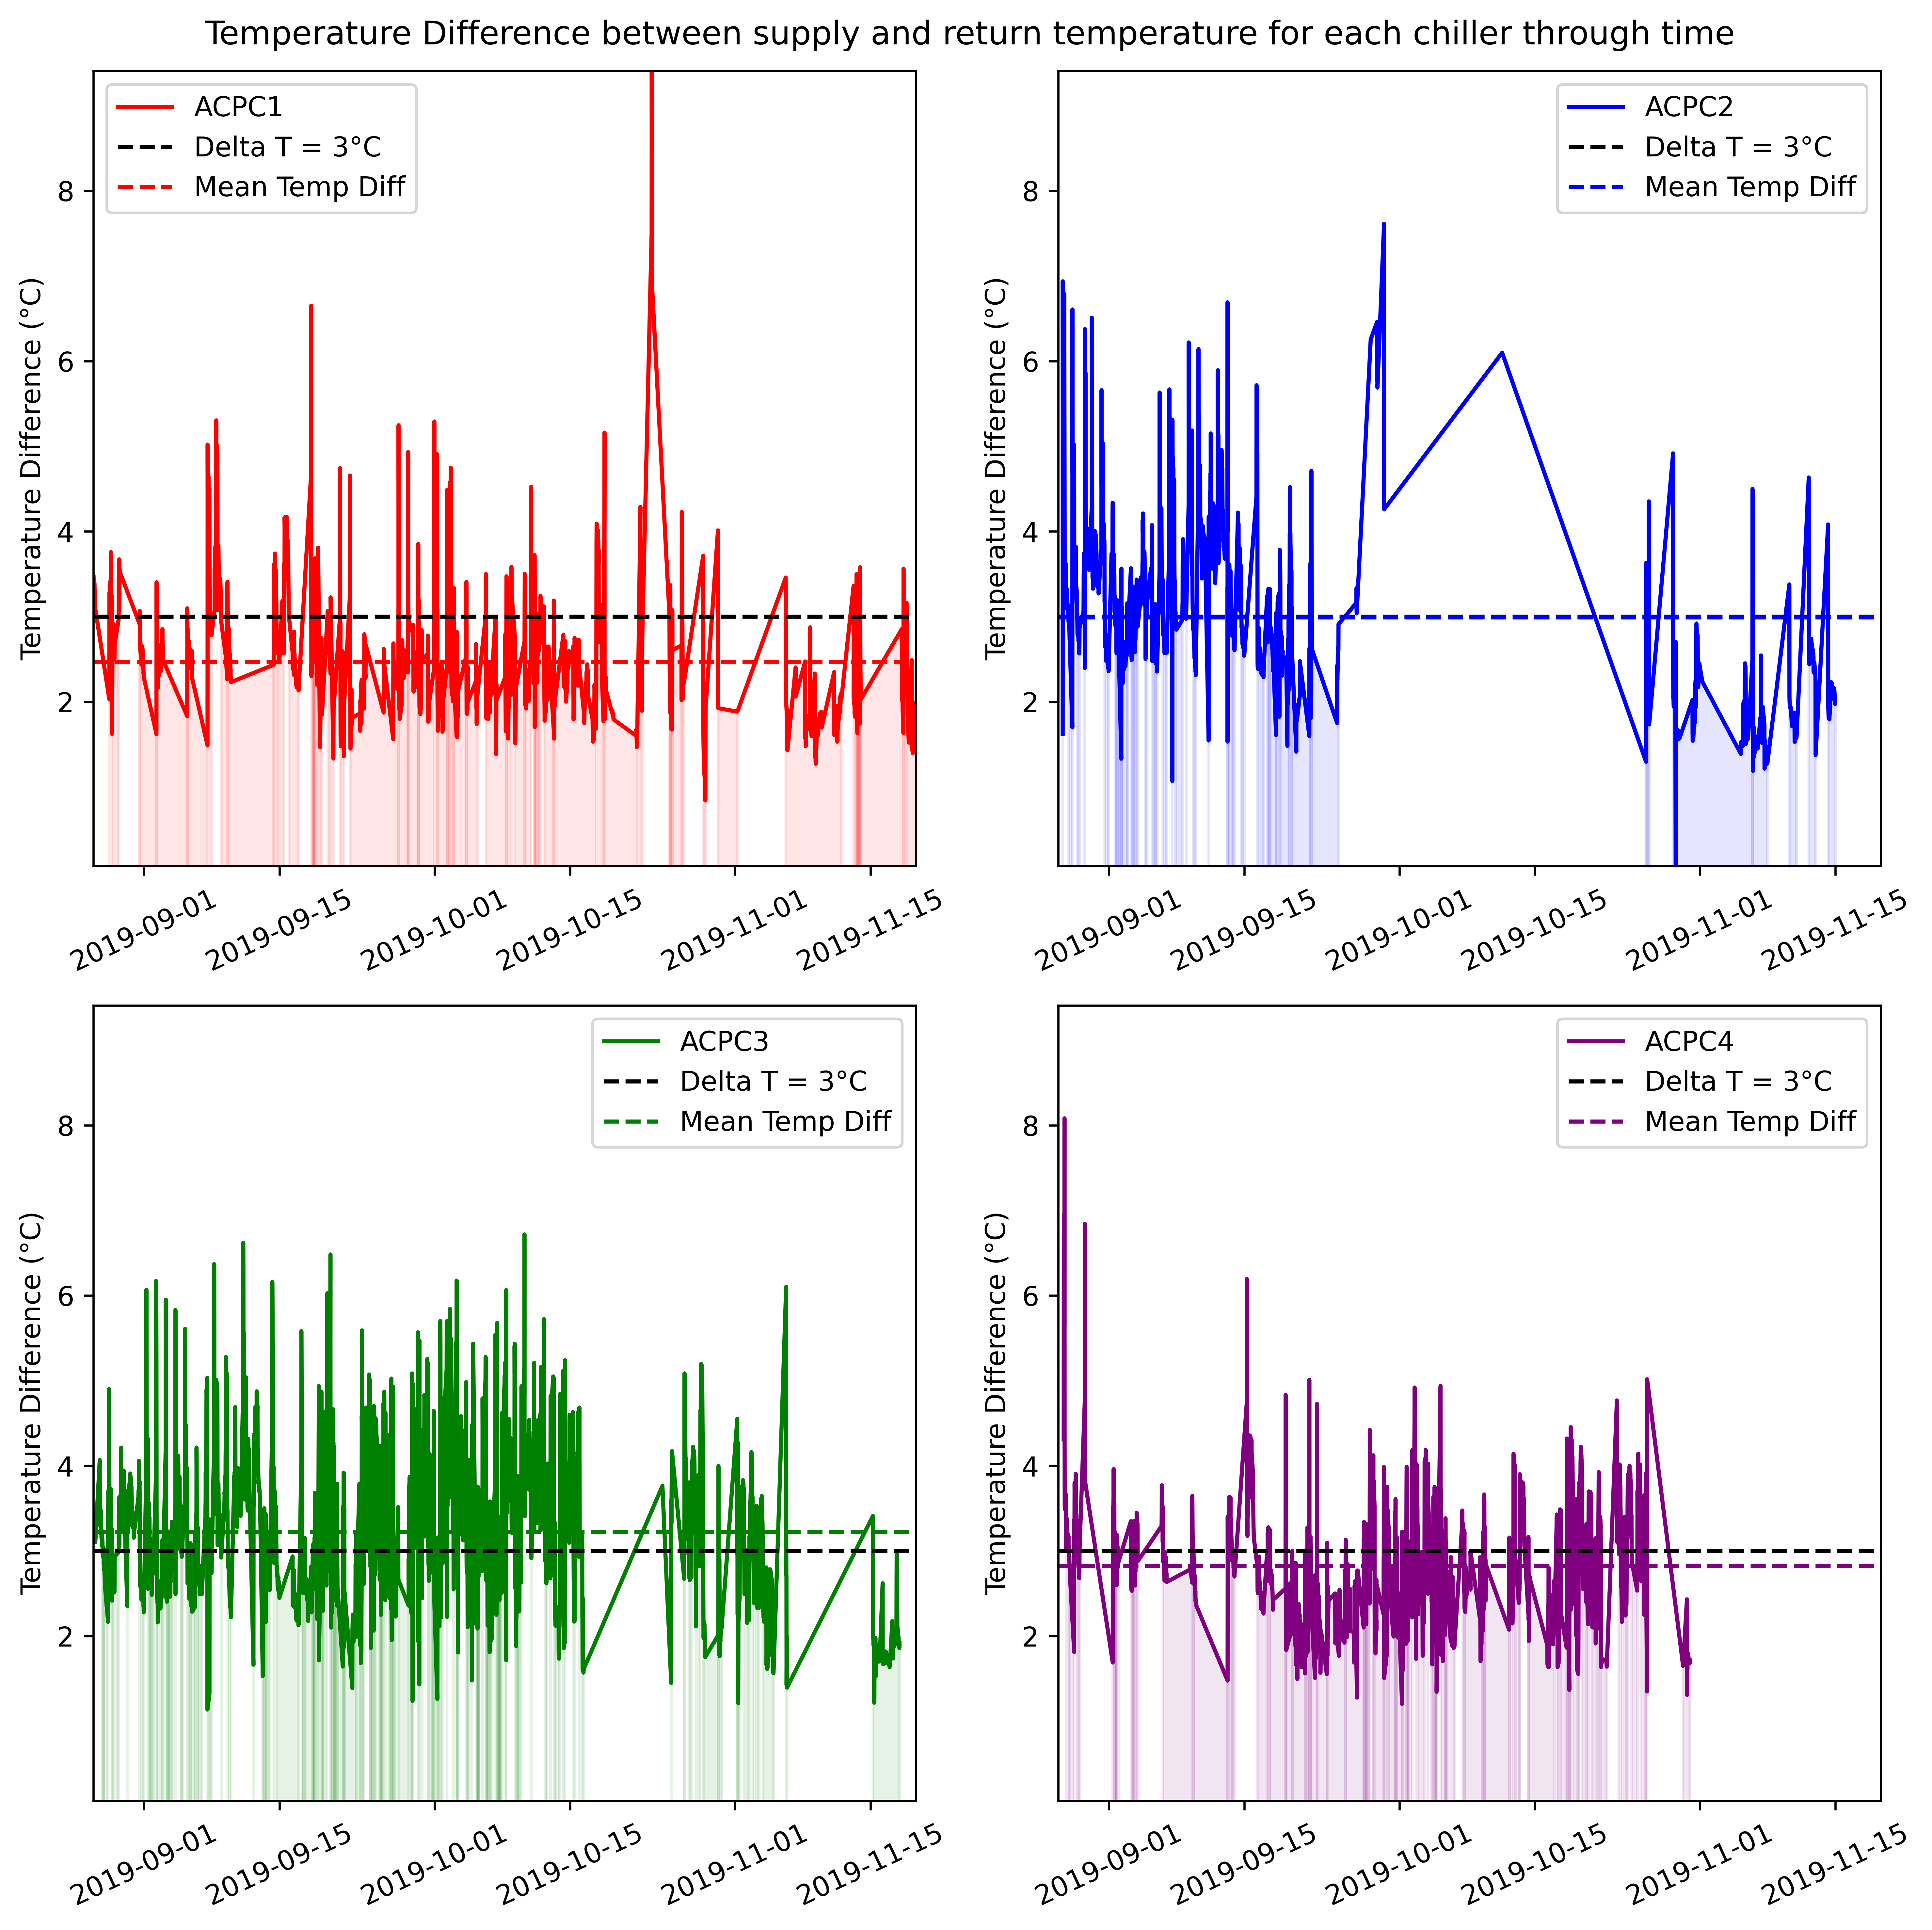

In [447]:
# plot the mean and standard deviation of the temperature difference for each chiller
fig = plt.figure(figsize=(5, 5),dpi=600)
plt.errorbar(['ACPC1','ACPC2','ACPC3','ACPC4'],[np.mean(ACPC1_Temp_diff),np.mean(ACPC2_Temp_diff),np.mean(ACPC3_Temp_diff),np.mean(ACPC4_Temp_diff)],c='black',
             yerr=[np.std(ACPC1_Temp_diff),np.std(ACPC2_Temp_diff),np.std(ACPC3_Temp_diff),np.std(ACPC4_Temp_diff)],fmt='o',ecolor=['red','blue','green','purple'])
plt.ylabel('Temperature Difference (°C)')
plt.title('Mean and Standard Deviation of Temperature Difference for each Chiller')
plt.show()

# plot the temperature difference between supply and return temperature for each chiller
fig = plt.figure(figsize=(10, 10),dpi=600)

plt.subplot(2, 2, 1)
plt.plot(ACPC1_on_time,ACPC1_Temp_diff,label='ACPC1',c='red')
plt.xlim(min(min(ACPC1_on_time), min(ACPC2_on_time), min(ACPC3_on_time), min(ACPC4_on_time)),
         max(max(ACPC1_on_time), max(ACPC2_on_time), max(ACPC3_on_time), max(ACPC4_on_time)))
plt.ylim(min(min(ACPC1_Temp_diff), min(ACPC2_Temp_diff), min(ACPC3_Temp_diff), min(ACPC4_Temp_diff)),
         max(max(ACPC1_Temp_diff), max(ACPC2_Temp_diff), max(ACPC3_Temp_diff), max(ACPC4_Temp_diff)))
plt.xticks(rotation=25)
plt.axhline(y=3, color='black', linestyle='--', label='Delta T = 3°C')
plt.ylabel('Temperature Difference (°C)')
plt.axhline(np.mean(ACPC1_Temp_diff), color='red', linestyle='--', label='Mean Temp Diff')
plt.fill_between(ACPC1_on_time, ACPC1_Temp_diff, where=np.array(ACPC1_Temp_diff) < 3, interpolate=True, color='red', alpha=0.1)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(ACPC2_on_time,ACPC2_Temp_diff,label='ACPC2',c='blue')
plt.xlim(min(min(ACPC1_on_time), min(ACPC2_on_time), min(ACPC3_on_time), min(ACPC4_on_time)),
         max(max(ACPC1_on_time), max(ACPC2_on_time), max(ACPC3_on_time), max(ACPC4_on_time)))
plt.ylim(min(min(ACPC1_Temp_diff), min(ACPC2_Temp_diff), min(ACPC3_Temp_diff), min(ACPC4_Temp_diff)),
         max(max(ACPC1_Temp_diff), max(ACPC2_Temp_diff), max(ACPC3_Temp_diff), max(ACPC4_Temp_diff)))
plt.xticks(rotation=25)
plt.axhline(y=3, color='black', linestyle='--', label='Delta T = 3°C')
plt.ylabel('Temperature Difference (°C)')
plt.axhline(np.mean(ACPC2_Temp_diff), color='blue', linestyle='--', label='Mean Temp Diff')
plt.fill_between(ACPC2_on_time, ACPC2_Temp_diff, where=np.array(ACPC2_Temp_diff) < 3, interpolate=True, color='blue', alpha=0.1)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(ACPC3_on_time,ACPC3_Temp_diff,label='ACPC3',c='green')
plt.xlim(min(min(ACPC1_on_time), min(ACPC2_on_time), min(ACPC3_on_time), min(ACPC4_on_time)),
         max(max(ACPC1_on_time), max(ACPC2_on_time), max(ACPC3_on_time), max(ACPC4_on_time)))
plt.ylim(min(min(ACPC1_Temp_diff), min(ACPC2_Temp_diff), min(ACPC3_Temp_diff), min(ACPC4_Temp_diff)),
         max(max(ACPC1_Temp_diff), max(ACPC2_Temp_diff), max(ACPC3_Temp_diff), max(ACPC4_Temp_diff)))
plt.xticks(rotation=25)
plt.axhline(y=3, color='black', linestyle='--', label='Delta T = 3°C')
plt.ylabel('Temperature Difference (°C)')
plt.axhline(np.mean(ACPC3_Temp_diff), color='green', linestyle='--', label='Mean Temp Diff')
plt.fill_between(ACPC3_on_time, ACPC3_Temp_diff, where=np.array(ACPC3_Temp_diff) < 3, interpolate=True, color='green', alpha=0.1)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(ACPC4_on_time,ACPC4_Temp_diff,label='ACPC4',c='purple')
plt.xlim(min(min(ACPC1_on_time), min(ACPC2_on_time), min(ACPC3_on_time), min(ACPC4_on_time)),
         max(max(ACPC1_on_time), max(ACPC2_on_time), max(ACPC3_on_time), max(ACPC4_on_time)))
plt.ylim(min(min(ACPC1_Temp_diff), min(ACPC2_Temp_diff), min(ACPC3_Temp_diff), min(ACPC4_Temp_diff)),
         max(max(ACPC1_Temp_diff), max(ACPC2_Temp_diff), max(ACPC3_Temp_diff), max(ACPC4_Temp_diff)))
plt.xticks(rotation=25)
plt.axhline(y=3, color='black', linestyle='--', label='Delta T = 3°C')
plt.ylabel('Temperature Difference (°C)')
plt.axhline(np.mean(ACPC4_Temp_diff), color='purple', linestyle='--', label='Mean Temp Diff')
plt.fill_between(ACPC4_on_time, ACPC4_Temp_diff, where=np.array(ACPC4_Temp_diff) < 3, interpolate=True, color='purple', alpha=0.1)
plt.legend()

plt.suptitle('Temperature Difference between supply and return temperature for each chiller through time')
plt.tight_layout()
plt.show()

In [448]:
# calculate percentage of datapoints beneath the 3°C threshold
print('Percentage of datapoints beneath 3 degrees ACPC1:',"{:.1f}".format(len([i for i in ACPC1_Temp_diff if i < 3])/len(ACPC1_Temp_diff)*100),'%')
print('Percentage of datapoints beneath 3 degrees ACPC2:',"{:.1f}".format(len([i for i in ACPC2_Temp_diff if i < 3])/len(ACPC2_Temp_diff)*100),'%')
print('Percentage of datapoints beneath 3 degrees ACPC3:',"{:.1f}".format(len([i for i in ACPC3_Temp_diff if i < 3])/len(ACPC3_Temp_diff)*100),'%')
print('Percentage of datapoints beneath 3 degrees ACPC4:',"{:.1f}".format(len([i for i in ACPC4_Temp_diff if i < 3])/len(ACPC4_Temp_diff)*100),'%')

Percentage of datapoints beneath 3 degrees ACPC1: 80.6 %
Percentage of datapoints beneath 3 degrees ACPC2: 54.3 %
Percentage of datapoints beneath 3 degrees ACPC3: 42.0 %
Percentage of datapoints beneath 3 degrees ACPC4: 63.0 %


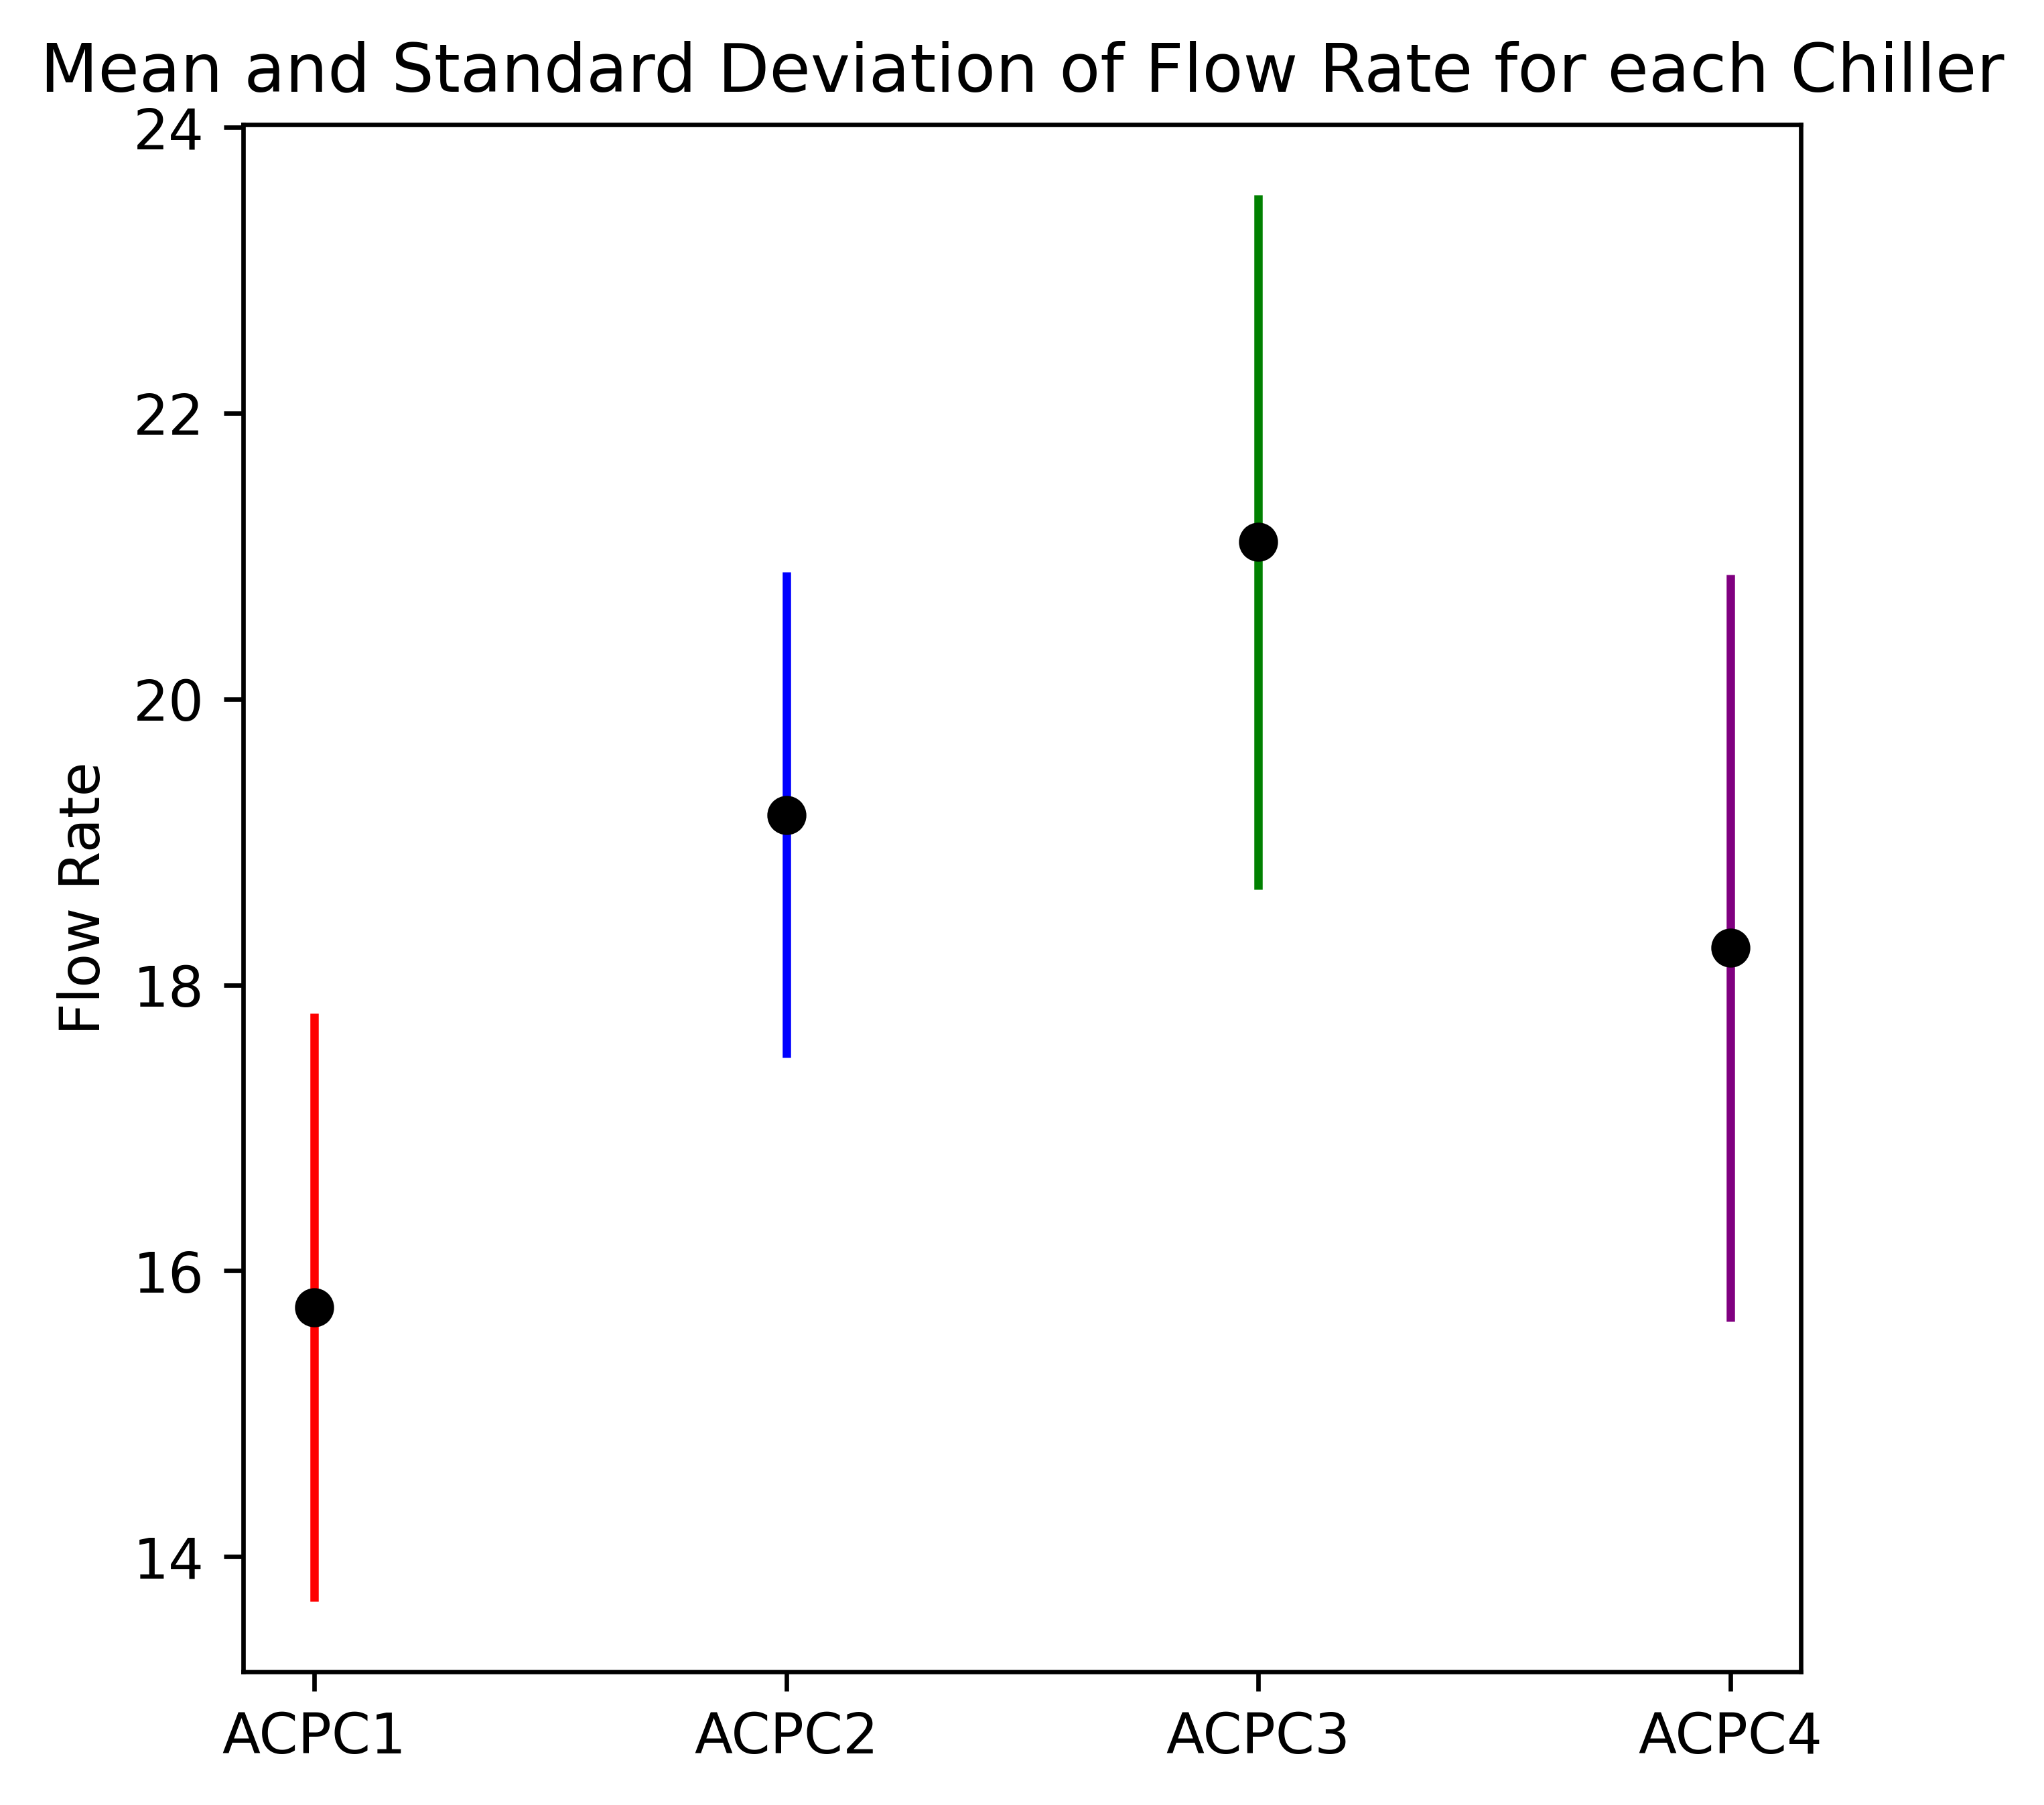

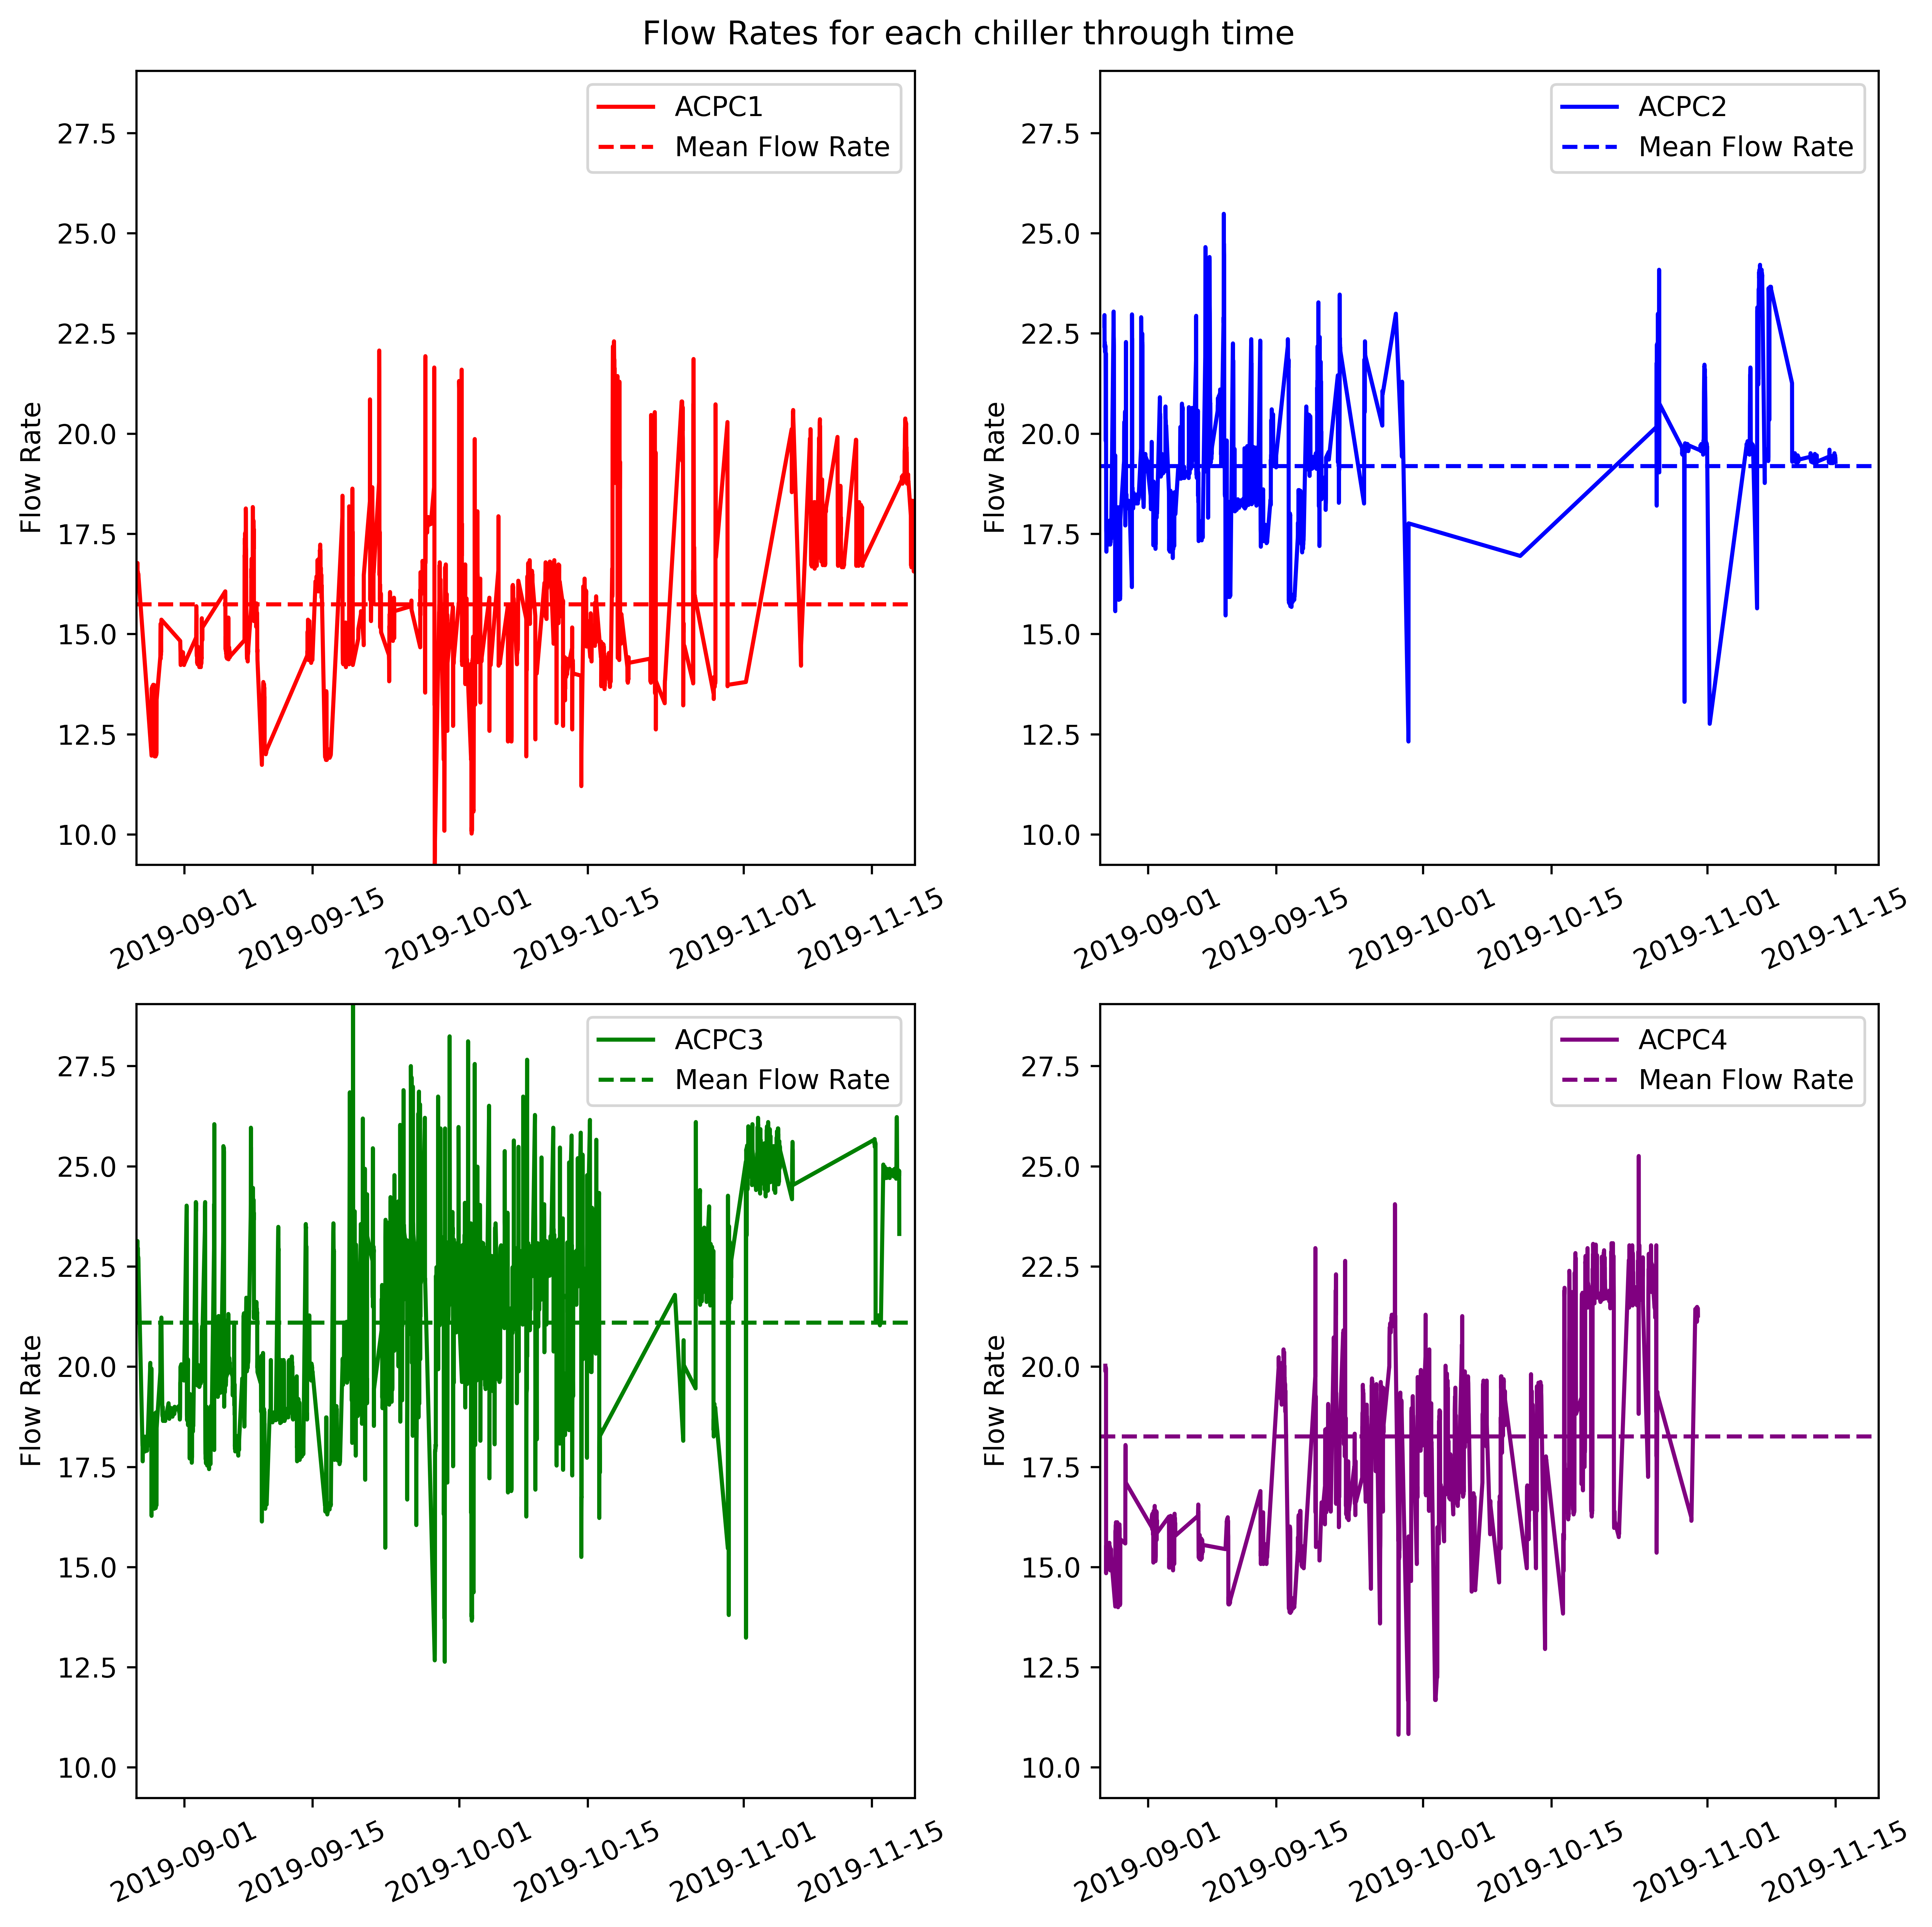

In [449]:
# plot the mean flow rate and standard deviation for each chiller
fig = plt.figure(figsize=(5, 5),dpi=600)
plt.errorbar(['ACPC1','ACPC2','ACPC3','ACPC4'], [np.mean(ACPC1_Rate_on),np.mean(ACPC2_Rate_on),np.mean(ACPC3_Rate_on),np.mean(ACPC4_Rate_on)],c='black', 
             yerr=[np.std(ACPC1_Rate_on),np.std(ACPC2_Rate_on),np.std(ACPC3_Rate_on),np.std(ACPC4_Rate_on)], fmt="o",ecolor=['red','blue','green','purple'])
plt.ylabel('Flow Rate')
plt.title('Mean and Standard Deviation of Flow Rate for each Chiller')
plt.show()

# plot flow rates for each chiller through time
fig = plt.figure(figsize=(10, 10),dpi=600)

plt.subplot(2, 2, 1)
plt.plot(ACPC1_on_time,ACPC1_Rate_on,label='ACPC1',c='red')
plt.xlim(min(min(ACPC1_on_time), min(ACPC2_on_time), min(ACPC3_on_time), min(ACPC4_on_time)),
         max(max(ACPC1_on_time), max(ACPC2_on_time), max(ACPC3_on_time), max(ACPC4_on_time)))
plt.ylim(min(min(ACPC1_Rate_on), min(ACPC2_Rate_on), min(ACPC3_Rate_on), min(ACPC4_Rate_on)),
         max(max(ACPC1_Rate_on), max(ACPC2_Rate_on), max(ACPC3_Rate_on), max(ACPC4_Rate_on)))
plt.xticks(rotation=25)
plt.ylabel('Flow Rate')
plt.axhline(np.mean(ACPC1_Rate_on), color='red', linestyle='--', label='Mean Flow Rate')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(ACPC2_on_time,ACPC2_Rate_on,label='ACPC2',c='blue')
plt.xlim(min(min(ACPC1_on_time), min(ACPC2_on_time), min(ACPC3_on_time), min(ACPC4_on_time)),
         max(max(ACPC1_on_time), max(ACPC2_on_time), max(ACPC3_on_time), max(ACPC4_on_time)))
plt.ylim(min(min(ACPC1_Rate_on), min(ACPC2_Rate_on), min(ACPC3_Rate_on), min(ACPC4_Rate_on)),
         max(max(ACPC1_Rate_on), max(ACPC2_Rate_on), max(ACPC3_Rate_on), max(ACPC4_Rate_on)))
plt.xticks(rotation=25)
plt.ylabel('Flow Rate')
plt.axhline(np.mean(ACPC2_Rate_on), color='blue', linestyle='--', label='Mean Flow Rate')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(ACPC3_on_time,ACPC3_Rate_on,label='ACPC3',c='green')
plt.xlim(min(min(ACPC1_on_time), min(ACPC2_on_time), min(ACPC3_on_time), min(ACPC4_on_time)),
         max(max(ACPC1_on_time), max(ACPC2_on_time), max(ACPC3_on_time), max(ACPC4_on_time)))
plt.ylim(min(min(ACPC1_Rate_on), min(ACPC2_Rate_on), min(ACPC3_Rate_on), min(ACPC4_Rate_on)),
         max(max(ACPC1_Rate_on), max(ACPC2_Rate_on), max(ACPC3_Rate_on), max(ACPC4_Rate_on)))
plt.xticks(rotation=25)
plt.ylabel('Flow Rate')
plt.axhline(np.mean(ACPC3_Rate_on), color='green', linestyle='--', label='Mean Flow Rate')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(ACPC4_on_time,ACPC4_Rate_on,label='ACPC4',c='purple')
plt.xlim(min(min(ACPC1_on_time), min(ACPC2_on_time), min(ACPC3_on_time), min(ACPC4_on_time)),
         max(max(ACPC1_on_time), max(ACPC2_on_time), max(ACPC3_on_time), max(ACPC4_on_time)))
plt.ylim(min(min(ACPC1_Rate_on), min(ACPC2_Rate_on), min(ACPC3_Rate_on), min(ACPC4_Rate_on)),
         max(max(ACPC1_Rate_on), max(ACPC2_Rate_on), max(ACPC3_Rate_on), max(ACPC4_Rate_on)))
plt.xticks(rotation=25)
plt.ylabel('Flow Rate')
plt.axhline(np.mean(ACPC4_Rate_on), color='purple', linestyle='--', label='Mean Flow Rate')
plt.legend()

plt.suptitle('Flow Rates for each chiller through time')
plt.tight_layout()
plt.show()

# Analysis

**Chiller Temperature Difference between supply and return:**
- Each chiller’s Delta T is below 3°C for some of the operating time in all 4 chillers, indicating that none of the chillers achieve a consistently sufficient temperature difference between the supply and return temperatures. This aligns with the symptom of “low chilled water delta T”.
- There are a few outliers in Delta T data for each chiller, suggesting occasional deviations from normal operating conditions.
- Delta T for each chiller exhibit some variability over time but there are no obvious trends indicating a consistent increase or decrease over time.
- **Prioritisation:** 
    - ACPC1 has the lowest mean temperature difference between supply and return which is below the 3 degrees threshold, followed by ACPC4 and ACPC2 mean temperature differences which are also below the 3 degrees threshold, and then ACPC3 mean temperature difference which is above the 3 degrees threshold.
    - ACPC1 has the highest percentage of its temperature difference datapoints beneath the 3 degrees threshold, and so investigation into this chiller should be prioritised, followed by ACPC4, ACPC2, and ACPC3. This aligns with the mean temperature difference prioritisation and mean flow rate prioritisation (detailed below).

**Chiller Flow Rates:**
- The flow rates for each chiller exhibit some variability over time but there are no obvious trends indicating a consistent increase or decrease over time.
- There are a few outliers in the Flow Rate data for each chiller, suggesting occasional deviations from normal operating conditions.
- **Prioritisation:** 
    - ACPC1 has the lowest mean flow rate, followed by ACPC4, ACPC2, and ACPC3. This means that ACPC1 could struggle the most to achieve optimal temperature differences perhaps due to restrictions or inefficiencies in the system that need to be addressed. Therefore, investigation into APC1 should be prioritised, followed by ACPC4, ACPC2 and ACPC3. This aligns with the mean temperature difference prioritisation and prioritisation based on the percentage of datapoints beneath 3 degrees (detailed above).

**Recommendation: Prioritise investigation into ACPC1 due to this chiller having the lowest mean flow rate, the lowest mean temperature difference between supply and return, and the highest percentage of its temperature difference datapoints beneath the 3 degrees threshold.**